In [1]:
import mne
from mne.datasets import sample
from mne import io
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne.preprocessing import ICA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import fnmatch
from fooof import FOOOF

In [2]:
ROOT = '/home/dcellier/RDSS/dev_1_f/1606_63_Baseline.mff'

In [3]:
raw=mne.io.read_raw_egi(ROOT,montage=mne.channels.read_montage(kind='GSN-HydroCel-128'),preload=True, verbose=True)

Reading EGI MFF Header from /home/dcellier/RDSS/dev_1_f/1606_63_Baseline.mff...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {} ...
Reading 0 ... 183332  =      0.000 ...   183.332 secs...


<ipython-input-3-143f5ee20223>:1: RuntimeWarning: Did not find any event code with more than one event.
  raw=mne.io.read_raw_egi(ROOT,montage=mne.channels.read_montage(kind='GSN-HydroCel-128'),preload=True, verbose=True)
<ipython-input-3-143f5ee20223>:1: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ['E129']. Their position has been left untouched.
  raw=mne.io.read_raw_egi(ROOT,montage=mne.channels.read_montage(kind='GSN-HydroCel-128'),preload=True, verbose=True)


In [4]:
dataChannels = ['E2','E3','E4','E5','E6','E7','E9','E10','E11','E12','E13','E15','E16','E18','E19','E20','E22','E23','E24','E26','E27','E28','E29','E30','E31','E33','E34','E35','E36','E37','E39','E40','E41','E42','E45','E46','E47','E50','E51','E52','E53','E54','E55','E58','E59','E60','E61','E62','E65','E66','E67','E70','E71','E72','E75','E76','E77','E78','E79','E80','E83','E84','E85','E86','E87','E90','E91','E92','E93','E96','E97','E98','E101','E102','E103','E104','E105','E106','E108','E109','E110','E111','E112','E115','E116','E117','E118','E122','E123','E124']
#this is the list of 'real' channels that Justin sent, all others are external electrodes
extChannels = [e['ch_name'] for e in raw.info['chs'] if (e['ch_name'] not in dataChannels)]
extChannels.remove('VBeg')
extChannels.remove('STI 014')
extChannels.remove('E129')
ch_type_dict={}
for c in extChannels:
    ch_type_dict[c]='ecg'
raw.set_channel_types(ch_type_dict)

In [5]:
#extChannels

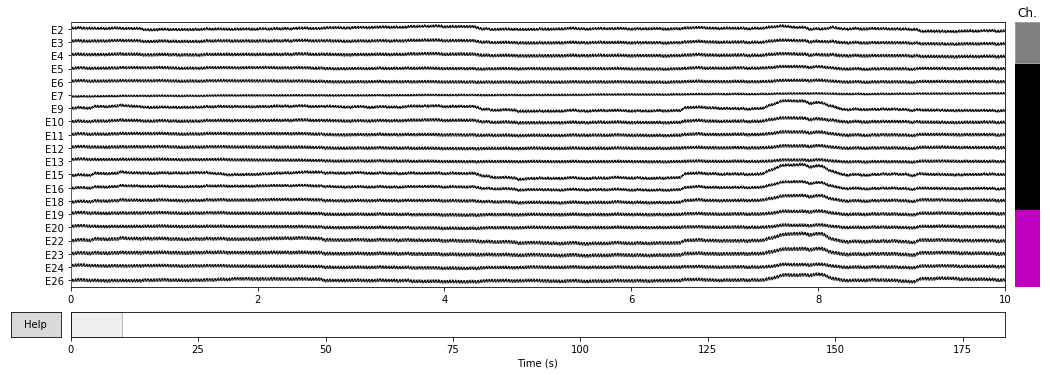

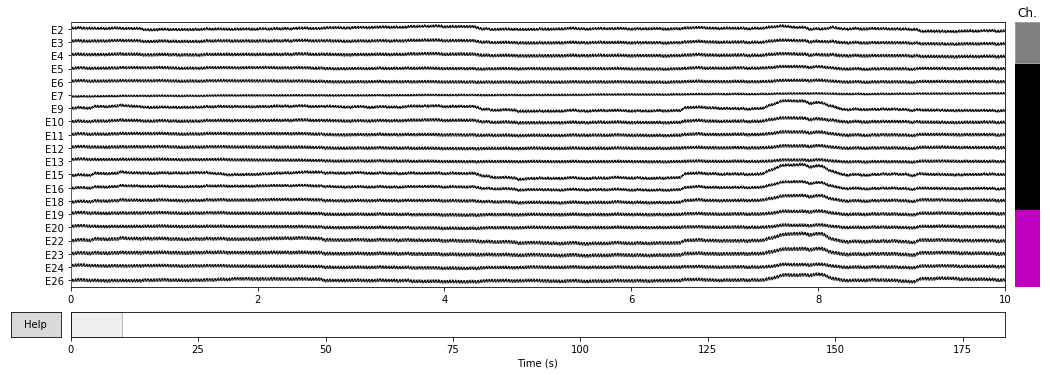

In [6]:
raw.plot(scalings={'eeg':.0003})

In [7]:
mne.find_events(raw)

1 events found
Event IDs: [1]


array([[1308,    0,    1]])

In [8]:
raw.info

<Info | 17 non-empty fields
    bads : list | 0 items
    ch_names : list | E1, E2, E3, E4, E5, E6, E7, E8, E9, ...
    chs : list | 131 items (ECG: 38, EEG: 91, STIM: 2)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 131 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 500.0 Hz
    meas_date : tuple | 2018-08-07 14:21:24 GMT
    nchan : int | 131
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 1000.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType


In [9]:
raw.times[1308::2000]

array([  1.308,   3.308,   5.308,   7.308,   9.308,  11.308,  13.308,
        15.308,  17.308,  19.308,  21.308,  23.308,  25.308,  27.308,
        29.308,  31.308,  33.308,  35.308,  37.308,  39.308,  41.308,
        43.308,  45.308,  47.308,  49.308,  51.308,  53.308,  55.308,
        57.308,  59.308,  61.308,  63.308,  65.308,  67.308,  69.308,
        71.308,  73.308,  75.308,  77.308,  79.308,  81.308,  83.308,
        85.308,  87.308,  89.308,  91.308,  93.308,  95.308,  97.308,
        99.308, 101.308, 103.308, 105.308, 107.308, 109.308, 111.308,
       113.308, 115.308, 117.308, 119.308, 121.308, 123.308, 125.308,
       127.308, 129.308, 131.308, 133.308, 135.308, 137.308, 139.308,
       141.308, 143.308, 145.308, 147.308, 149.308, 151.308, 153.308,
       155.308, 157.308, 159.308, 161.308, 163.308, 165.308, 167.308,
       169.308, 171.308, 173.308, 175.308, 177.308, 179.308, 181.308,
       183.308])

In [10]:
len(raw.times)/1000


183.333

In [11]:
two_second_ind=1308
new_events=[]
while two_second_ind <= 179308:
    new_events.append([two_second_ind, 0, 7])
    two_second_ind+=2000

In [12]:
new_events

[[1308, 0, 7],
 [3308, 0, 7],
 [5308, 0, 7],
 [7308, 0, 7],
 [9308, 0, 7],
 [11308, 0, 7],
 [13308, 0, 7],
 [15308, 0, 7],
 [17308, 0, 7],
 [19308, 0, 7],
 [21308, 0, 7],
 [23308, 0, 7],
 [25308, 0, 7],
 [27308, 0, 7],
 [29308, 0, 7],
 [31308, 0, 7],
 [33308, 0, 7],
 [35308, 0, 7],
 [37308, 0, 7],
 [39308, 0, 7],
 [41308, 0, 7],
 [43308, 0, 7],
 [45308, 0, 7],
 [47308, 0, 7],
 [49308, 0, 7],
 [51308, 0, 7],
 [53308, 0, 7],
 [55308, 0, 7],
 [57308, 0, 7],
 [59308, 0, 7],
 [61308, 0, 7],
 [63308, 0, 7],
 [65308, 0, 7],
 [67308, 0, 7],
 [69308, 0, 7],
 [71308, 0, 7],
 [73308, 0, 7],
 [75308, 0, 7],
 [77308, 0, 7],
 [79308, 0, 7],
 [81308, 0, 7],
 [83308, 0, 7],
 [85308, 0, 7],
 [87308, 0, 7],
 [89308, 0, 7],
 [91308, 0, 7],
 [93308, 0, 7],
 [95308, 0, 7],
 [97308, 0, 7],
 [99308, 0, 7],
 [101308, 0, 7],
 [103308, 0, 7],
 [105308, 0, 7],
 [107308, 0, 7],
 [109308, 0, 7],
 [111308, 0, 7],
 [113308, 0, 7],
 [115308, 0, 7],
 [117308, 0, 7],
 [119308, 0, 7],
 [121308, 0, 7],
 [123308, 0, 7],
 

In [13]:
raw.add_events(np.asarray(new_events),'STI 014',replace=True)

In [14]:
#mne.find_events(raw)

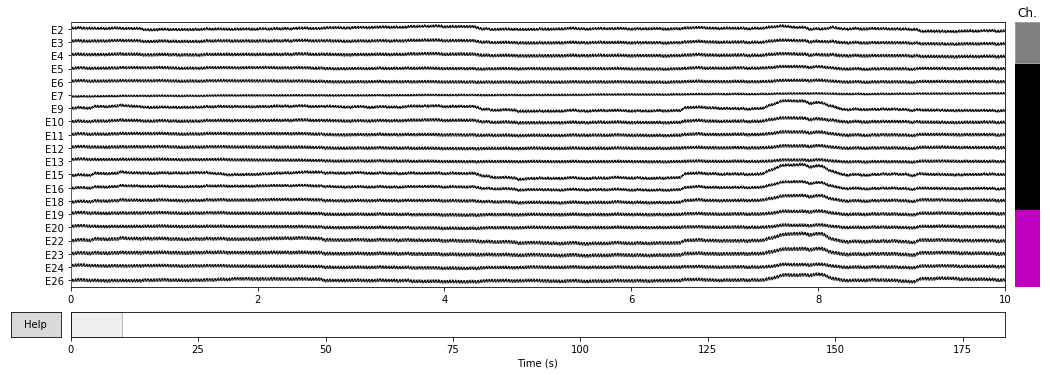

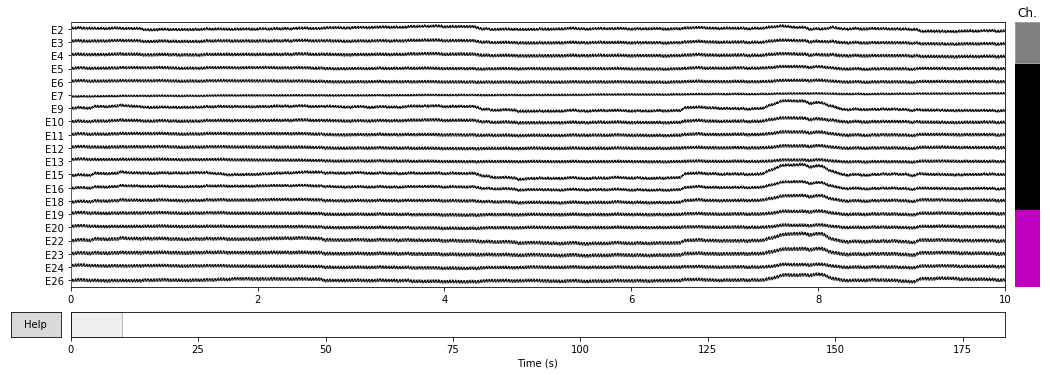

In [15]:
raw.plot(scalings={'eeg':.0003})

In [16]:
raw.load_data()
raw=raw.filter(1,50)

Setting up band-pass filter from 1 - 50 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 12.5 Hz
Filter length of 3301 samples (3.301 sec) selected


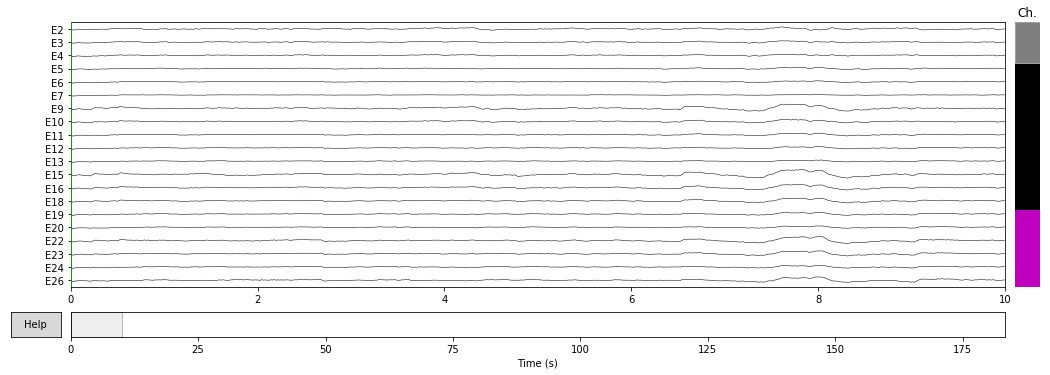

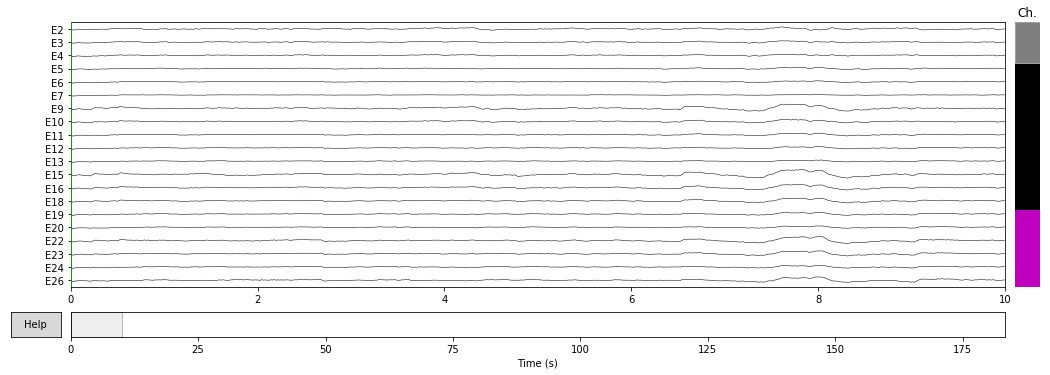

In [17]:
raw.plot(scalings={'eeg':.0003})

In [18]:
lout=mne.channels.find_layout(raw.info)

/home/dcellier/.local/lib/python3.7/site-packages/mne/transforms.py:689: RuntimeWarning: invalid value encountered in true_divide
  out[:, 2] = np.arccos(cart[:, 2] / out[:, 0])


In [19]:
#lout.pos

In [20]:
raw, r=mne.set_eeg_reference(raw,ref_channels=dataChannels+extChannels)#two_sec_eps.info['ch_names']) 

Applying a custom EEG reference.


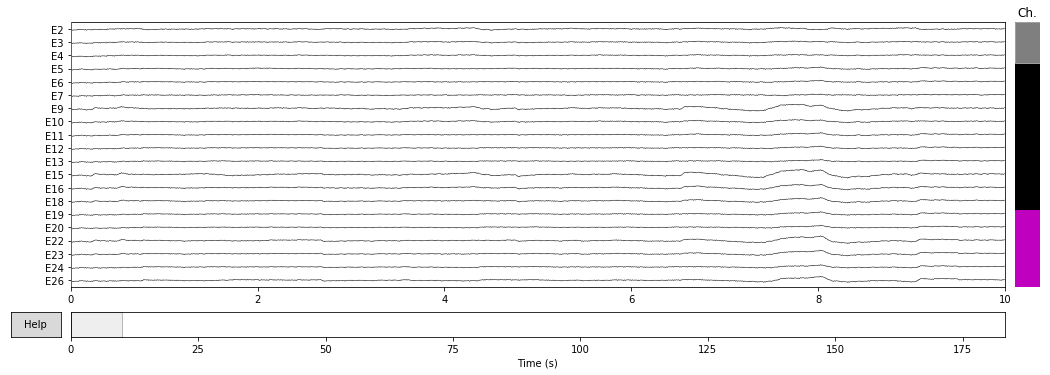

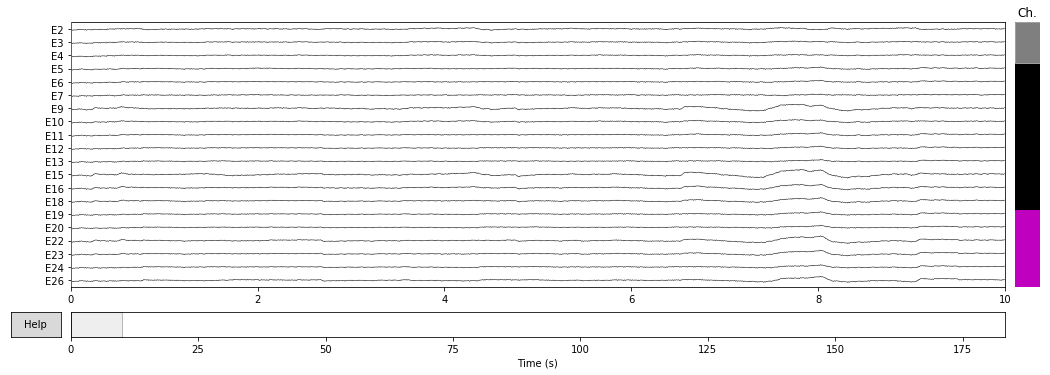

In [21]:
raw.plot(scalings={'eeg':.0003})

In [22]:
ica = ICA(n_components=90,random_state=25)
picks=mne.pick_types(raw.info, meg=False, eeg=True, eog=False,ecg=False)
ica.fit(raw,picks)

Fitting ICA to data using 91 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 90 components
Fitting ICA took 11.5s.


<ICA  |  raw data decomposition, fit (fastica): 183333 samples, 90 components, channels used: "eeg">

In [23]:
eog_ic=[]
for ch in ['E25','E17','E8','E21','E14','E125','E126','E127','E128']: #insert EOG channels
    #ecg_epochs=create_ecg_epochs(data,ch_name=ch) # ?
    eog_idx,scores=ica.find_bads_eog(raw,ch_name=ch)
    eog_ic.append(eog_idx)

Using channel E25 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz
Filter length of 16384 samples (16.384 sec) selected
... filtering target
Setting up band-pass filter from 1 - 10 Hz
Filter length of 16384 samples (16.384 sec) selected
Using channel E17 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz
Filter length of 16384 samples (16.384 sec) selected
... filtering target
Setting up band-pass filter from 1 - 10 Hz
Filter length of 16384 samples (16.384 sec) selected
Using channel E8 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz
Filter length of 16384 samples (16.384 sec) selected
... filtering target
Setting up band-pass filter from 1 - 10 Hz
Filter length of 16384 samples (16.384 sec) selected
Using channel E21 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz
Filter length of 16384 samples (16.384 sec) selected
... filtering target
Setting u

In [24]:
reject_ic=[]
for eog_inds in eog_ic:
    for ele in eog_inds:
        if ele not in reject_ic:
            reject_ic.append(ele)

print(reject_ic)                

ica.exclude=[]
ica.exclude.extend(reject_ic) #which IC's to exclude

[0, 1, 2, 3, 4, 9]


In [25]:
ica.exclude

[0, 1, 2, 3, 4, 9]

/home/dcellier/.local/lib/python3.7/site-packages/mne/transforms.py:689: RuntimeWarning: invalid value encountered in true_divide
  out[:, 2] = np.arccos(cart[:, 2] / out[:, 0])


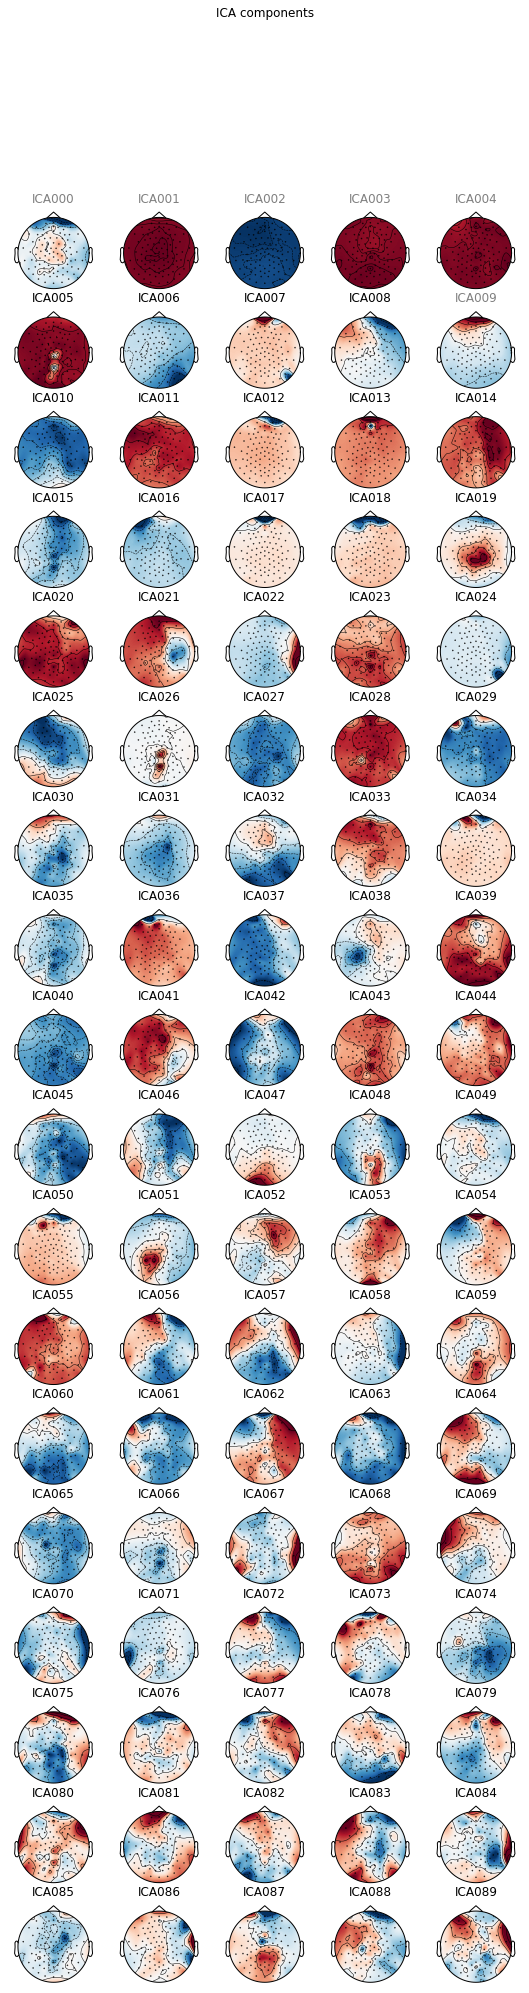

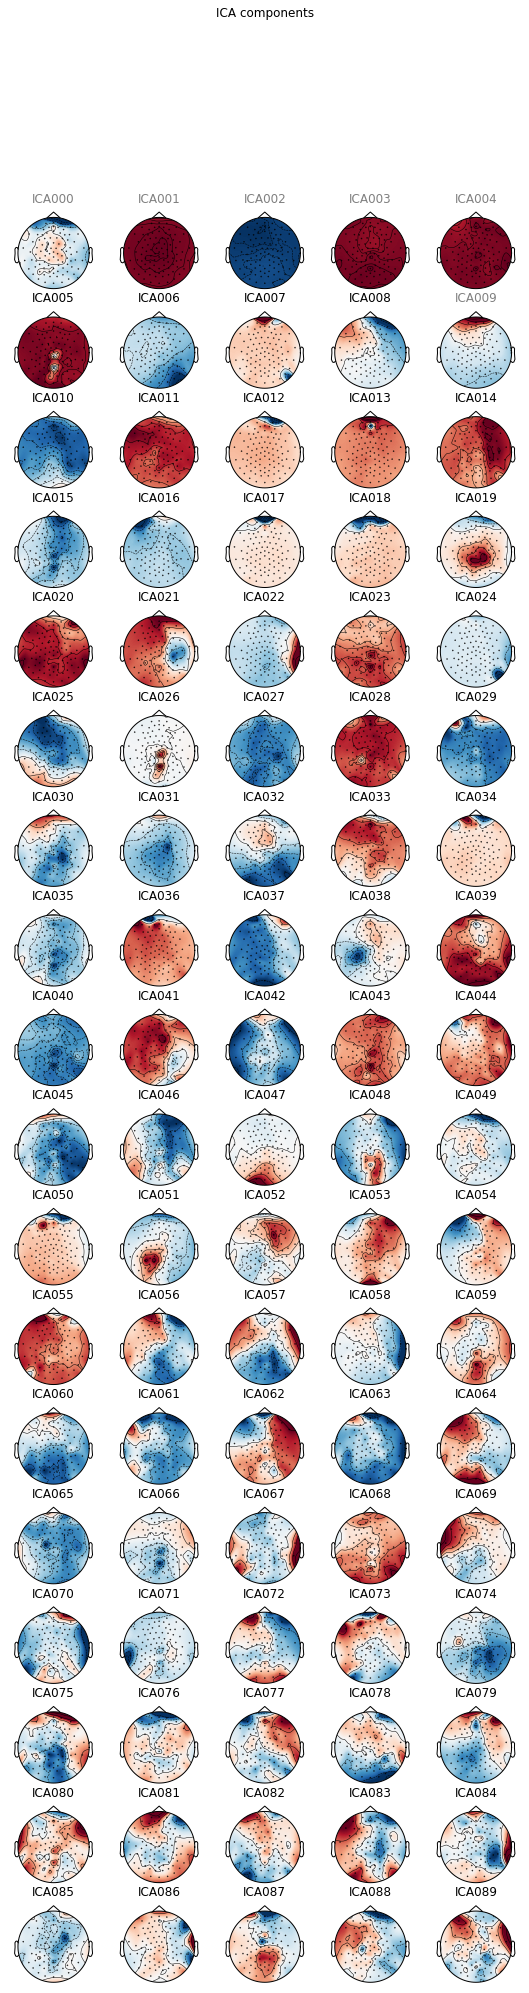

In [26]:
ica.plot_components(picks=range(90),ch_type=None,inst=raw)

In [27]:
ica.apply(raw,exclude=ica.exclude)

Transforming to ICA space (90 components)
Zeroing out 6 ICA components


<RawMff  |  signal1.bin, n_channels x n_times : 131 x 183333 (183.3 sec), ~183.6 MB, data loaded>

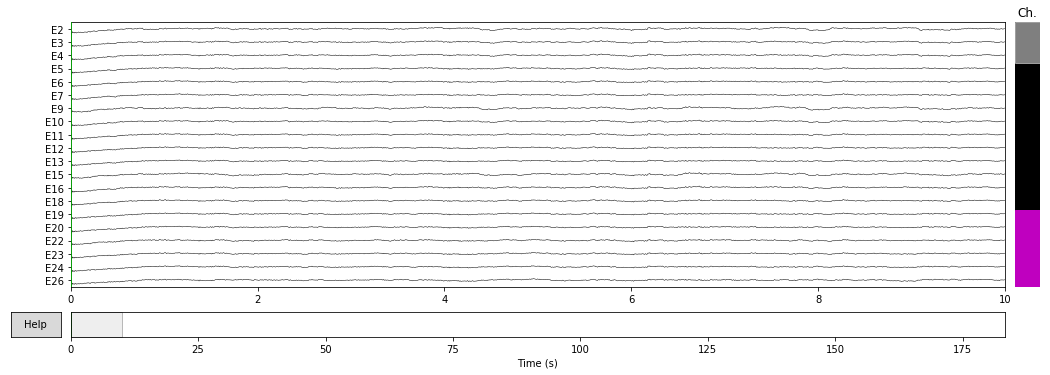

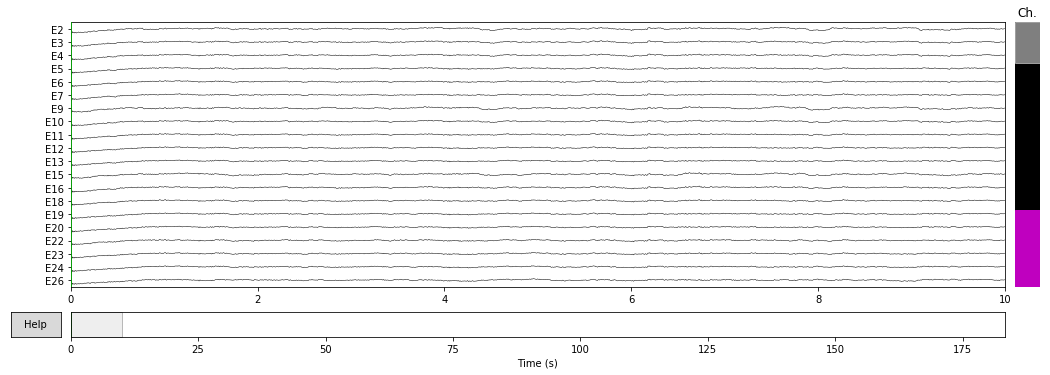

In [28]:
raw.plot(scalings={'eeg':.0003})

In [29]:
two_sec_eps=mne.Epochs(raw,new_events,event_id={'twoSec':7},tmin=0,tmax=2,reject_by_annotation=False)

90 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [30]:
# rereferencing using the ext and data channels makes the IC's look more real

In [2]:
test=mne.read_epochs('/home/dcellier/RDSS/dev_1_f/sample_preproc-epo.fif')

Reading /home/dcellier/RDSS/dev_1_f/sample_preproc-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2000.00 ms
        0 CTF compensation matrices available
90 matching events found
Applying baseline correction (mode: mean)
90 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [3]:
psds,freqs=mne.time_frequency.psd_welch(test,fmin=1,fmax=50,tmax=2,n_overlap=(len(test.times)*.125))

Effective window size : 0.256 (s)


In [4]:
freqs

array([ 3.90625,  7.8125 , 11.71875, 15.625  , 19.53125, 23.4375 ,
       27.34375, 31.25   , 35.15625, 39.0625 , 42.96875, 46.875  ])

In [5]:
psds.shape

(90, 90, 12)

In [6]:
psds_mean=np.mean(psds,axis=0)

In [7]:
psds_more_mean=np.mean(psds_mean,axis=0)

In [8]:
psds_more_mean.shape

(12,)

In [9]:
f= FOOOF()
freq_range=[1,50]


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 3.91 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is freq-res)
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 3 - 47 Hz                        
                                 Frequency Resolution is 3.91 Hz                                  
                                                                                                  
                             Background Parameters (offset, slope):    

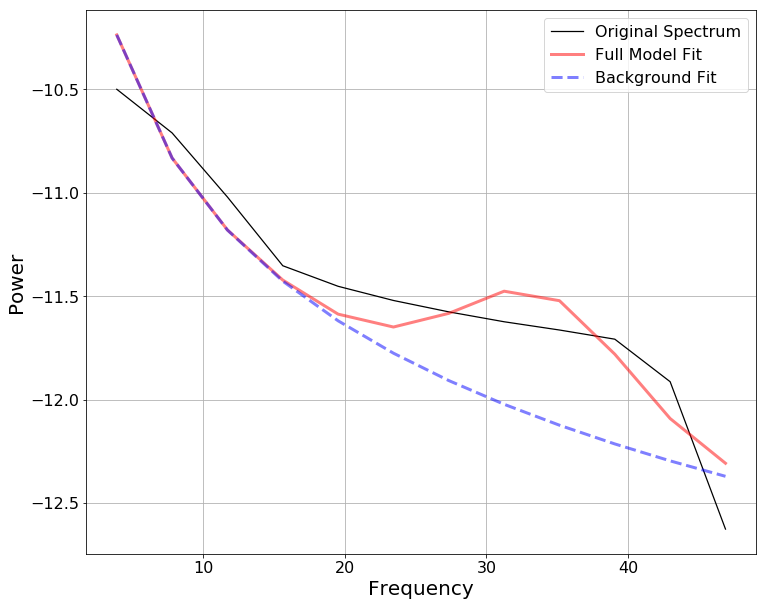

In [10]:
f.report(freqs,psds_more_mean,freq_range)